In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [6]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [7]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
mi_csk=matches[((matches.team1=='Mumbai Indians') | (matches.team2=='Mumbai Indians')) & ((matches.team1=='Chennai Super Kings') | (matches.team2=='Chennai Super Kings'))]
mi=matches[(matches.team1=='Mumbai Indians') | (matches.team2=='Mumbai Indians')]
csk=matches[(matches.team1=='Chennai Super Kings') | (matches.team2=='Chennai Super Kings')]
mi_csk.shape,mi.shape,csk.shape

((28, 18), (187, 18), (164, 18))

In [9]:
mi_cskdeli=deliveries[((deliveries.batting_team=='Mumbai Indians') | (deliveries.bowling_team=='Mumbai Indians')) & ((deliveries.batting_team=='Chennai Super Kings') | (deliveries.bowling_team=='Chennai Super Kings'))]
mideli=deliveries[(deliveries.batting_team=='Mumbai Indians') | (deliveries.bowling_team=='Mumbai Indians')]
cskdeli=deliveries[(deliveries.batting_team=='Chennai Super Kings') | (deliveries.bowling_team=='Chennai Super Kings')]
mi_cskdeli.shape,mideli.shape,cskdeli.shape

((6812, 21), (45136, 21), (39318, 21))

# Q1

In [55]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='Darkorchid')
        ax[i].set_title(columns[i])

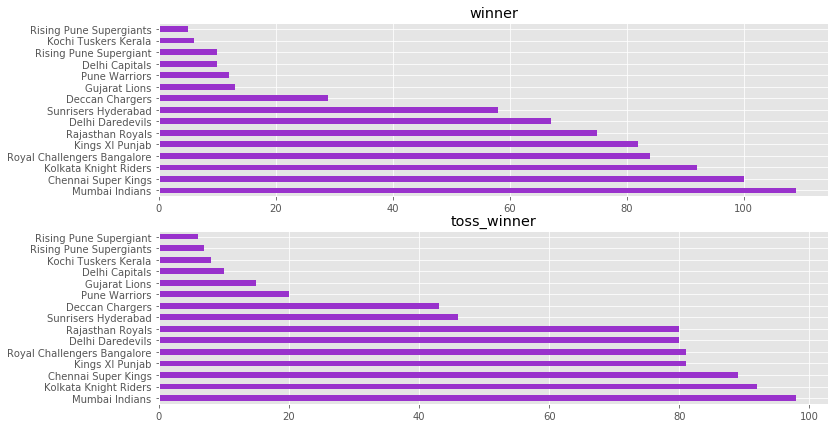

In [56]:
cat_plot(matches,['winner','toss_winner'],(12,7),'barh')

In [59]:
def cat_plot(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],autopct='%2.f%%',colors=['Darkorange','Darksalmon'])
        ax[i].set_title(columns[i])

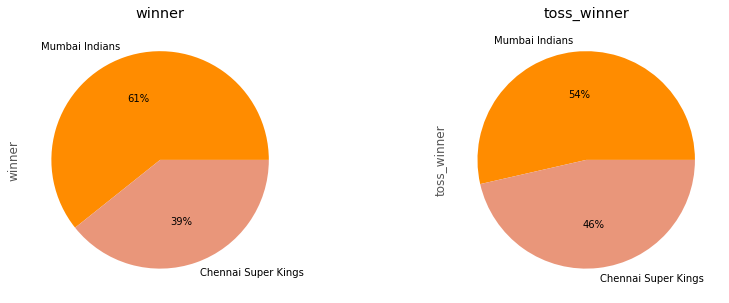

In [63]:
cat_plot(mi_csk,['winner','toss_winner'],(14,5),'pie')


### It's clearly visible that Mumbai Indians have a higher chance of winning as compared to CSK as they have got more wins as well as toss wins.

# Q2

#### First we will check the data for any team he has ever played for against anyone then we will check only csk and mi matches.

In [80]:
dekock_overall=deliveries[(deliveries.batsman.str.contains('Q de Kock')) & (deliveries.over<=2) & ((deliveries.batsman_runs==4)|(deliveries.batsman_runs==6))].groupby(['match_id',
                                                                                                                                                                        'batsman']).sum()
dekock_overall.batsman_runs

match_id  batsman  
414       Q de Kock     4
469       Q de Kock     4
473       Q de Kock     4
480       Q de Kock     4
483       Q de Kock     4
485       Q de Kock     8
495       Q de Kock     4
561       Q de Kock    12
578       Q de Kock    10
583       Q de Kock     4
587       Q de Kock    16
593       Q de Kock     8
607       Q de Kock     8
618       Q de Kock     8
632       Q de Kock     4
7896      Q de Kock     4
7901      Q de Kock     8
7907      Q de Kock     4
7912      Q de Kock     4
7922      Q de Kock     8
11145     Q de Kock     8
11322     Q de Kock     8
11347     Q de Kock     6
11412     Q de Kock     4
Name: batsman_runs, dtype: int64

In [82]:
dekock_overall.batsman_runs.describe()

count    24.000000
mean      6.500000
std       3.134659
min       4.000000
25%       4.000000
50%       5.000000
75%       8.000000
max      16.000000
Name: batsman_runs, dtype: float64

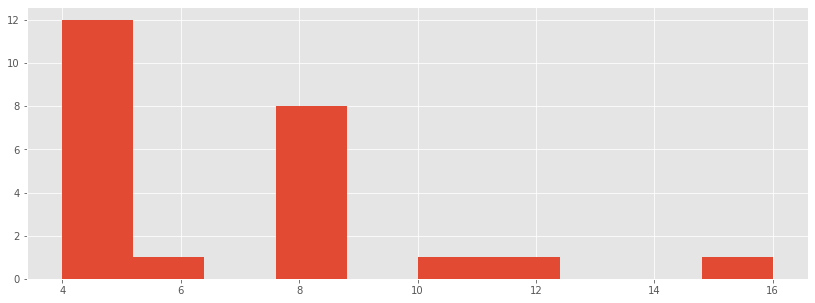

In [83]:
dekock_overall.batsman_runs.hist(figsize=(14,5))

In [100]:
dekock_headon=mi_cskdeli[(mi_cskdeli.batsman.str.contains('Q de Kock')) & (mi_cskdeli.over<=2) & ((mi_cskdeli.batsman_runs==4)|(mi_cskdeli.batsman_runs==6))].groupby(['match_id',
                                                                                                                                                                        'batsman']).sum()
dekock_headon.batsman_runs

match_id  batsman  
11412     Q de Kock    4
Name: batsman_runs, dtype: int64

In [101]:
dekock_headon.batsman_runs.describe()

count    1.0
mean     4.0
std      NaN
min      4.0
25%      4.0
50%      4.0
75%      4.0
max      4.0
Name: batsman_runs, dtype: float64

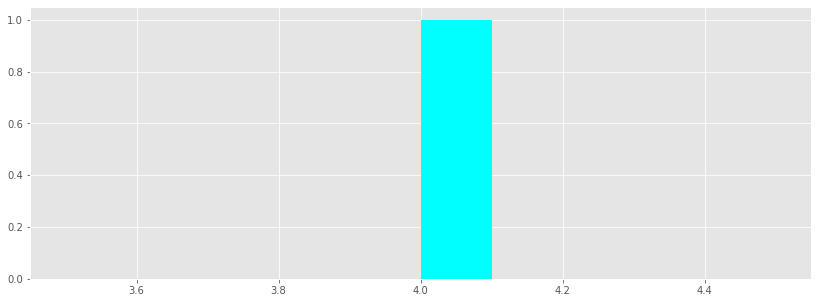

In [102]:
dekock_headon.batsman_runs.hist(figsize=(14,5),color='Aqua')

### As we can see above ,quinton has played only one match against csk when batting for me so we can only estimate his performance according to the overall data which also indicates a similar answer.

# Q3

In [128]:
ball_count=mideli[mideli.bowling_team=='Mumbai Indians'].groupby(['match_id','bowler']).ball.count()
dotball_count=mideli[(mideli.total_runs==0) & (mideli.bowling_team=='Mumbai Indians')].groupby(['match_id','bowler']).ball.count()
# & (deliveries.player_dismissed==np.nan)
print(ball_count,dotball_count)

match_id  bowler        
2         HH Pandya         24
          JJ Bumrah         24
          KA Pollard        12
          KH Pandya         12
          MJ McClenaghan    24
                            ..
11415     JJ Bumrah         24
          KH Pandya         18
          MJ McClenaghan    26
          RD Chahar         24
          SL Malinga        25
Name: ball, Length: 1125, dtype: int64 match_id  bowler        
2         HH Pandya          4
          JJ Bumrah          6
          KH Pandya          2
          MJ McClenaghan     9
          TG Southee         8
                            ..
11415     JJ Bumrah         11
          KH Pandya          8
          MJ McClenaghan    12
          RD Chahar         13
          SL Malinga         7
Name: ball, Length: 1094, dtype: int64


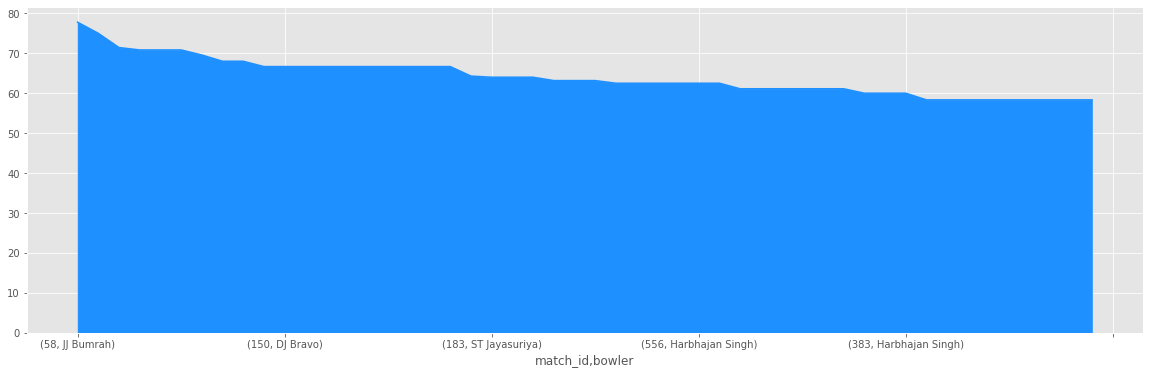

In [141]:
((dotball_count/ball_count)*100).sort_values(ascending=False).iloc[0:50].plot.area(figsize=(20,6),color='Dodgerblue')

### As we can see Jaspreet Bumrah is most likely to have the best dot balls to total balls ratio

# Q4

In [265]:
mi_cskdeli[(mi_cskdeli.batsman_runs==6) | (mi_cskdeli.batsman_runs==4)].groupby(['match_id','over','ball']).sum().batsman_runs

match_id  over  ball
67        1     4       4
                5       4
          2     4       4
                6       4
          3     2       4
                       ..
11415     18    5       6
          19    1       4
                6       4
          20    5       4
                6       4
Name: batsman_runs, Length: 999, dtype: int64

In [249]:
def match64(df):
    return df[(df.batsman_runs==6) | (df.batsman_runs==4)].groupby(['match_id','over','ball'],as_index=False).sum()
#[(df.batsman_runs==6) & (df.batsman_runs==4)]

In [250]:
match64(deliveries)

,match_id,over,ball,inning,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,3,1,0,0.0,0,0,0,0,4,0,4
1,1,1,5,2,0,0.0,0,0,0,0,4,0,4
2,1,1,6,2,0,0.0,0,0,0,0,4,0,4
3,1,2,2,1,0,0.0,0,0,0,0,4,0,4
4,1,2,4,1,0,0.0,0,0,0,0,6,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26188,11415,18,5,1,0,0.0,0,0,0,0,6,0,6
26189,11415,19,1,1,0,0.0,0,0,0,0,4,0,4
26190,11415,19,6,2,0,0.0,4,0,0,0,4,4,8
26191,11415,20,5,1,0,0.0,0,0,0,0,4,0,4


In [255]:
df=match64(deliveries)[['ball','over','batsman_runs']]
df

,ball,over,batsman_runs
0,3,1,4
1,5,1,4
2,6,1,4
3,2,2,4
4,4,2,6
...,...,...,...
26188,5,18,6
26189,1,19,4
26190,6,19,4
26191,5,20,4


# Q5